## Environemnt Check

This project is being developed in part on Kaggle and also locally on my personal device. Any code to provide utilities in relation to this fact is included, therefore, in the following cell and documented as such. 

In [2]:
import os 

def is_kaggle():
    """
    Function to check if the working
    environmnet is a kaggle environment
    """
    return 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

"You are in Kaggle" if is_kaggle() else "You are not in Kaggle"

'You are in Kaggle'

In [3]:
!pip install pyedflib
!pip install natsort

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.4 MB/s eta 0:00:00a 0:00:01


## Jupyter Notebook for ML pipeline and training

This notebook is for me to directly interface with my code and make it easier to see it's results at a glance.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from natsort import natsorted
from pprint import pprint
from pyedflib import highlevel 

### Constants

In [7]:
# Data Paths 
if is_kaggle():
    DATA_BASEPATH = r"/kaggle/input/eeg-mi-dataset-for-the-fyp/files"
else:
    DATA_BASEPATH = r"../eeg-data/files"


# This list is the data corresponding to each volunteer in the study. The index n represents the (n-1)th patient
DATA_FILES = natsorted([f'{DATA_BASEPATH}/{volunteer_file}' for volunteer_file in os.listdir(DATA_BASEPATH) 
                        if volunteer_file.startswith("S0") or volunteer_file.startswith("S1")])

### Functions

In [8]:
# This function takes a user number and returns a dictionary of the user's data files 
def get_data_dictionary(user_index):
    actual_index = user_index - 1
    parent_dir = DATA_FILES[actual_index]
    user_files = os.listdir(parent_dir)
    
    # Filtering out the .event files. 
    filtered_files = [file for file in user_files if not file.endswith('.event')]
    patient_files = { f'task_{idx}' : f'{parent_dir}/{filtered_files[idx]}' for idx in range(len(filtered_files))}

    return patient_files

In [9]:
def plot_single_signal_channel(signals, signal_headers, channel):
    channel = 0
    signal = signals[channel]
    fs = signal_headers[channel]['sample_frequency']
    duration = len(signal) / fs
    time = np.linspace(0, duration, len(signal))

    plt.figure(figsize=(12, 4))
    plt.plot(time, signal)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(signal_headers[channel]['label'])
    plt.grid(True)
    plt.show()

def plot_all_signals(signals, signal_headers):
    n_channels = len(signals)
    fig, axes = plt.subplots(n_channels, 1, figsize=(12, 3*n_channels))

    for i in range(n_channels):
        signal = signals[i]
        fs = signal_headers[i]['sample_frequency']
        time = np.linspace(0, len(signal)/fs, len(signal))
        
        ax = axes[i] if n_channels > 1 else axes
        ax.plot(time, signal)
        ax.set_ylabel('Amplitude')
        ax.set_title(signal_headers[i]['label'])
        ax.grid(True)

    axes[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    plt.show()

### Actual Code

In [10]:
volunteer = 1
signals, signal_headers, headers = highlevel.read_edf(get_data_dictionary(volunteer)["task_1"])

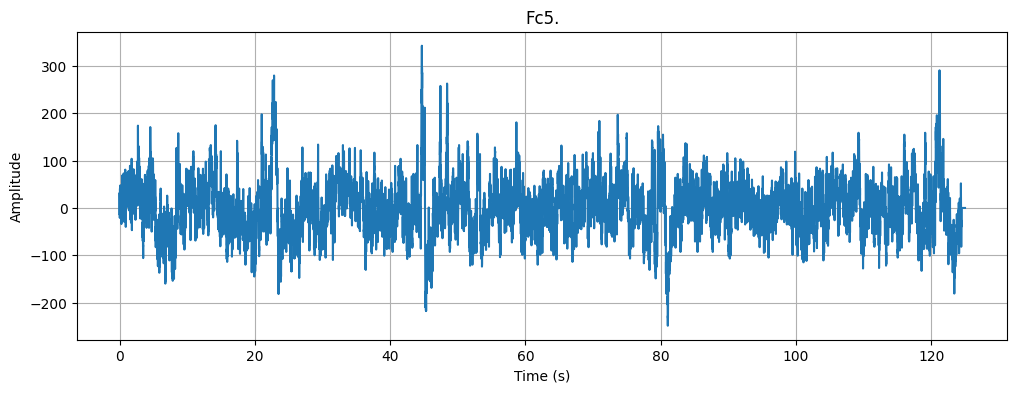

In [11]:
plot_single_signal_channel(signals, signal_headers, 1)

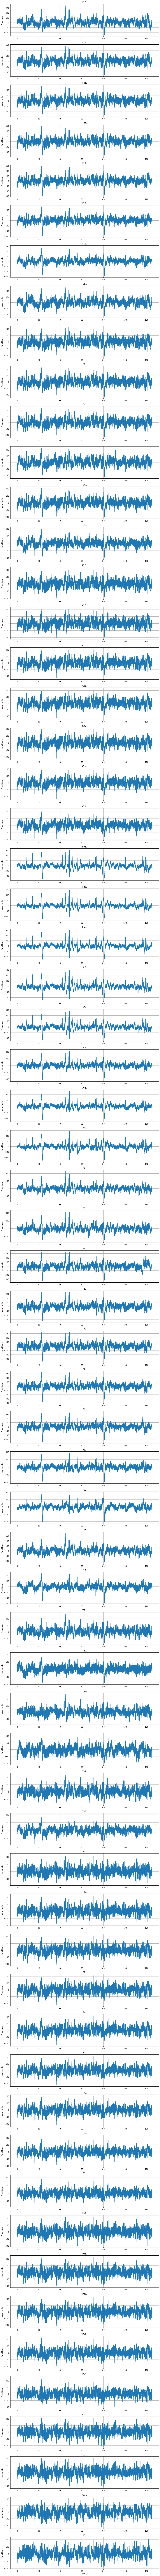

In [12]:
plot_all_signals(signals, signal_headers)

In [14]:
signals

array([[-13.,   3.,  32., ...,   0.,   0.,   0.],
       [-51., -34.,  -1., ...,   0.,   0.,   0.],
       [-71., -62., -24., ...,   0.,   0.,   0.],
       ...,
       [-60., -41., -26., ...,   0.,   0.,   0.],
       [-61., -34., -19., ...,   0.,   0.,   0.],
       [-80., -47., -35., ...,   0.,   0.,   0.]])